In [1]:
#
import pandas as pd
from datetime import datetime as dt
import numpy as np
import re
#
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible
#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix

In [2]:
# Load data
df = pd.read_csv("C:/Users/storm/Desktop/METIS/Project/project 3/Forestfires_cleaned.csv")


In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire_breakout
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
# create X matrix and y vector from columns 

X = df.drop(columns='fire_breakout')
y = df['fire_breakout']
print(X.shape , y.shape)

(517, 12) (517,)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              517 non-null    int64  
 1   Y              517 non-null    int64  
 2   month          517 non-null    int64  
 3   day            517 non-null    int64  
 4   FFMC           517 non-null    float64
 5   DMC            517 non-null    float64
 6   DC             517 non-null    float64
 7   ISI            517 non-null    float64
 8   temp           517 non-null    float64
 9   RH             517 non-null    int64  
 10  wind           517 non-null    float64
 11  rain           517 non-null    float64
 12  fire_breakout  517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [6]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire_breakout
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#method 1
#Parameter tuning for KNN

# search for an optimal value of K for KNN
k_range = list(range(1, 100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores = knn.score(X_test, y_test) 
    k_scores.append(scores) # use average accuracy as an estimate of out-of-sample accuracy
print(k_scores)

[0.5769230769230769, 0.5673076923076923, 0.5480769230769231, 0.6153846153846154, 0.6057692307692307, 0.6153846153846154, 0.6153846153846154, 0.6057692307692307, 0.5961538461538461, 0.6057692307692307, 0.6057692307692307, 0.5961538461538461, 0.6346153846153846, 0.625, 0.5961538461538461, 0.6057692307692307, 0.5961538461538461, 0.5961538461538461, 0.5673076923076923, 0.5576923076923077, 0.5865384615384616, 0.5865384615384616, 0.6057692307692307, 0.6057692307692307, 0.5961538461538461, 0.6057692307692307, 0.5865384615384616, 0.6153846153846154, 0.5961538461538461, 0.5865384615384616, 0.5961538461538461, 0.5961538461538461, 0.5865384615384616, 0.5961538461538461, 0.5961538461538461, 0.6057692307692307, 0.6057692307692307, 0.6057692307692307, 0.5961538461538461, 0.6153846153846154, 0.5961538461538461, 0.6153846153846154, 0.6057692307692307, 0.5961538461538461, 0.6057692307692307, 0.5961538461538461, 0.5961538461538461, 0.5865384615384616, 0.5961538461538461, 0.5961538461538461, 0.6057692307

Text(0, 0.5, 'Accuracy')

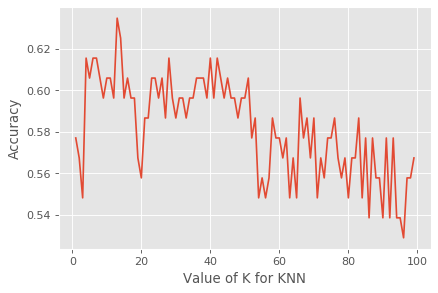

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot above results
# plot the value of K for KNN (x-axis) versus accuracy (y-axis) to find best K value
plt.figure(dpi=80)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

In [10]:
# fit on train
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

# test on test
y_pred = knn.predict(X_test)

print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))
print(metrics.accuracy_score(y_test, y_pred))

The score for kNN is
Training:  63.68%
Test set:  63.46%
0.6346153846153846


In [11]:
#method 2
#Alternative method using k-fold cross validation for para-tunning

In [12]:
#Parameter tuning for KNN

from sklearn.model_selection import cross_val_score

# search for an optimal value of K for KNN
k_range = list(range(1, 100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean()) # use average accuracy as an estimate of out-of-sample accuracy
print(k_scores)

[0.4621794871794872, 0.42560331825037706, 0.44117647058823534, 0.4854826546003017, 0.4914027149321266, 0.491289592760181, 0.5029788838612367, 0.4912895927601809, 0.5200980392156863, 0.5028657616892911, 0.5450980392156863, 0.5125188536953242, 0.5144042232277526, 0.5085972850678733, 0.5375942684766214, 0.5316365007541478, 0.5161387631975867, 0.5142533936651583, 0.5007541478129713, 0.5123303167420814, 0.5046380090497737, 0.5122926093514328, 0.5181749622926093, 0.5144042232277526, 0.5142533936651583, 0.5200980392156863, 0.504449472096531, 0.5142156862745099, 0.5180618401206637, 0.5334841628959277, 0.5257918552036199, 0.527790346907994, 0.5220211161387632, 0.529788838612368, 0.5296003016591252, 0.5372549019607844, 0.5314856711915535, 0.5314479638009051, 0.5314479638009051, 0.5353318250377074, 0.5314856711915535, 0.5276395173453997, 0.533446455505279, 0.5393665158371042, 0.5432880844645551, 0.5414027149321268, 0.5414404223227752, 0.5395173453996983, 0.5316742081447964, 0.533710407239819, 0.5

Text(0, 0.5, 'Cross-Validated Accuracy')

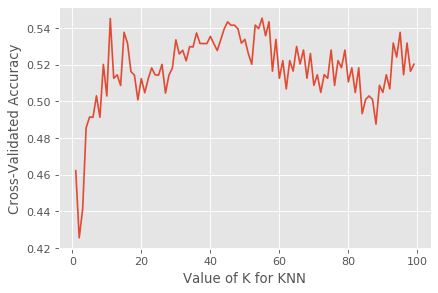

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis) to find best K value
plt.figure(dpi=80)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [14]:
#method 3
#Alternatve method for multiple parameters tuning using Gridsearch

In [15]:
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
k_range = list(range(1, 100))
weight_options = ['uniform', 'distance']

In [16]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'weights': ['uniform', 'distance']}


In [17]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train);

In [18]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6076403173670292
{'n_neighbors': 29, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='distance')


In [19]:
#Model selection using cross-validation

In [20]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)

In [21]:
# 5-fold cross-validation with the best KNN model(best k value)
knn = KNeighborsClassifier(n_neighbors=29, weights='distance')
print(cross_val_score(knn, X, y, cv=kf, scoring='accuracy').mean())

0.5861277072442121


In [22]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=29, weights='distance')
knn.fit(X_train, y_train)

# make a prediction on out-of-sample data
knn.predict(X_test)

array([0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1.])

In [23]:
#out-sample score
knn.score(X_test, y_test)

0.5673076923076923

In [24]:
print("kNN confusion matrix: \n\n", confusion_matrix(y_test,y_pred))

kNN confusion matrix: 

 [[37 14]
 [24 29]]


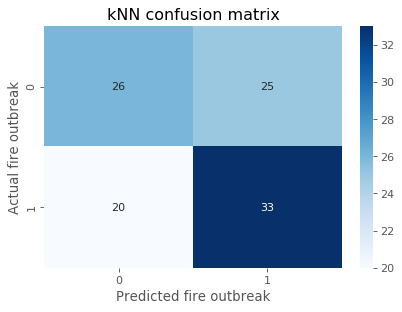

In [25]:
# Print confusion matrix for kNN
knn_confusion = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(dpi=80)
sns.heatmap(knn_confusion, annot = True, cmap=plt.cm.Blues)

plt.xlabel('Predicted fire outbreak')
plt.ylabel('Actual fire outbreak')
plt.title('kNN confusion matrix');

plt.savefig("confusion_matrix_knn_Forestfire")